<a href="https://colab.research.google.com/github/CamiLopez15/DeepLearning/blob/main/TareaDeRegresi%C3%B3nLOPEZ_Y_JARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Diagnostico(Datos) (1).csv to Diagnostico(Datos) (1).csv
Tamaño total del dataset antes de limpieza: 442
Valores únicos en 'GENERO' después de conversión: [0 1]
Tamaño total después de convertir a números: 442
Tamaño total después de eliminar valores NaN: 442
Datos antes de la división: X=(442, 11), y=(442,)
Datos de entrenamiento: 353, Datos de validación: 89
Datos de entrenamiento: (353, 11), Datos de validación: (89, 11)
Epoch 1/300


<ipython-input-3-2be830c0fb13>:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2557.3940 - mae: 43.1328 - val_loss: 1159.0416 - val_mae: 30.0597
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 563.2535 - mae: 19.5871 - val_loss: 290.3077 - val_mae: 13.2637
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 283.8699 - mae: 13.3815 - val_loss: 387.0925 - val_mae: 16.0141
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 260.1209 - mae: 12.4776 - val_loss: 269.7629 - val_mae: 13.1074
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 228.8926 - mae: 12.0898 - val_loss: 226.5258 - val_mae: 11.9322
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 199.4355 - mae: 11.0285 - val_loss: 235.8583 - val_mae: 12.2994
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 162.8903 - mae: 10.1847 - val_loss: 212.7692 - val_mae: 11.6679
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 132.8748 - mae: 9.0166 - val_loss: 153.2863 - val_mae: 9.8494
Epoch 9/300
18/18 ━━━━━━━━━

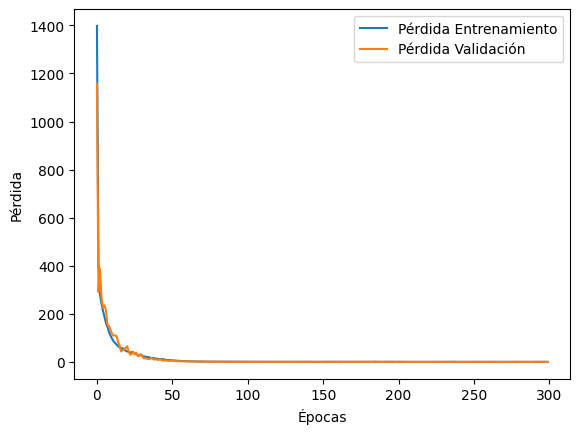

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files
import json
import gc

##DANIEL JARA
##CAMILA LOPEZ
# Limpieza de back out antes de iniciar
tf.keras.backend.clear_session()  # Reinicia la sesión de TensorFlow
gc.collect()  # Recolecta la basura y libera memoria

# 1. Subir el dataset
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # Obtener el nombre del archivo subido

# Leer el archivo CSV con el delimitador correcto
df = pd.read_csv(file_name, delimiter=';')

# 2. Mostrar el tamaño del dataset antes de la limpieza
print(f"Tamaño total del dataset antes de limpieza: {len(df)}")

# 3. Limpieza y ajuste de datos a valores numéricos
# Convertir la columna 'GENERO' de texto a valores numéricos si existe
if 'GENERO' in df.columns:
    df['GENERO'] = df['GENERO'].map({'MASCULINO': 0, 'FEMENINO': 1})
    print("Valores únicos en 'GENERO' después de conversión:", df['GENERO'].unique())

# Convertir comas a puntos en los números decimales
df = df.replace(',', '.', regex=True)

# Convertir texto a números y verificar cuántas filas quedan después de la conversión
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
print(f"Tamaño total después de convertir a números: {len(df)}")

# Eliminar filas con valores NaN y mostrar cuántas filas quedan
df = df.dropna()
print(f"Tamaño total después de eliminar valores NaN: {len(df)}")

# 4. Verificar si el dataset sigue teniendo datos
if len(df) == 0:
    raise ValueError("Error: El dataset quedó vacío después de la limpieza. Revisa el procesamiento de datos.")

# 5. Seleccionar características de entrada (features) y etiqueta (label)
X = df.iloc[:, :-1].values  # Todas las columnas excepto la última
y = df.iloc[:, -1].values  # Última columna como variable objetivo

# 6. Verificar si X y y tienen datos antes de la división
print(f"Datos antes de la división: X={X.shape}, y={y.shape}")
if len(X) == 0 or len(y) == 0:
    raise ValueError("Error: No hay suficientes datos para continuar con el modelo.")

# 7. Dividir el dataset en 80% entrenamiento y 20% prueba sin aleatorización
train_size = int(len(X) * 0.8)  # Ajuste dinámico
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 8. Verificar que las dimensiones sean correctas antes de entrenar
print(f"Datos de entrenamiento: {len(X_train)}, Datos de validación: {len(X_test)}")
print(f"Datos de entrenamiento: {X_train.shape}, Datos de validación: {X_test.shape}")
if len(X_train) == 0 or len(y_train) == 0:
    raise ValueError("Error: No hay suficientes datos para entrenar el modelo.")

# 9. Definir el modelo de regresión lineal
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='linear')
])

# 10. Configurar hiperparámetros
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='mse',
              metrics=['mae'])

# 11. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=300, batch_size=20, validation_data=(X_test, y_test))

# 12. Evaluar el modelo
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Error en validación (MAE): {test_mae}")

# 13. Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# 14. Guardar los hiperparámetros finales
final_hyperparameters = {
    'optimizer': 'Adam',
    'learning_rate': 0.01,
    'epochs': 300,
    'batch_size': 20,
    'loss_function': 'mse'
}

# Guardar en un archivo JSON
with open("hyperparameters.json", "w") as f:
    json.dump(final_hyperparameters, f)

